<h1 align="center"><font size="15">Customer Segmentation</font></h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Explore the data

In [2]:
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
cust_df.count()

Customer Id        850
Age                850
Edu                850
Years Employed     850
Income             850
Card Debt          850
Other Debt         850
Defaulted          700
Address            850
DebtIncomeRatio    850
dtype: int64

In [4]:
cust_df.shape

(850, 10)

In [5]:
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [7]:
cust_df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [8]:
# renaming some of the columns
cust_df.rename(columns = {'Edu': 'Education'}, inplace = True)
cust_df.head()

,Customer Id,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
# we will drop the adress variable as it is categorical variable bcz clustering algo needs continous numerical variable
df = cust_df.drop(['Defaulted', 'DebtIncomeRatio', 'Customer Id', 'Education', 'Years Employed', 'Address'],  axis  = 1)

df.head()

,Age,Income,Card Debt,Other Debt
0,41,19,0.124,1.073
1,47,100,4.582,8.218
2,33,57,6.111,5.802
3,29,19,0.681,0.516
4,47,253,9.308,8.908


In [10]:
# .values is a function in pandas to convert pandas dataframe into a numpy array 
# this is needed as clustering algorithm work on numerical matrices ie arrays
df.values #[:, 1:] [ rows, columns] [inclusive, exclusive means have to increase an index]

array([[ 41.   ,  19.   ,   0.124,   1.073],
       [ 47.   , 100.   ,   4.582,   8.218],
       [ 33.   ,  57.   ,   6.111,   5.802],
       ...,
       [ 25.   ,  18.   ,   2.802,   3.21 ],
       [ 32.   ,  28.   ,   0.116,   0.696],
       [ 52.   ,  64.   ,   1.866,   3.638]])

In [11]:
# [first row, 2nd column]
df.values[:, 1]

# [first row, 1st column]
df.values[:, 0]

array([41., 47., 33., 29., 47., 40., 38., 42., 26., 47., 44., 34., 24.,
       46., 28., 24., 29., 43., 44., 36., 29., 36., 28., 45., 37., 43.,
       24., 37., 38., 34., 40., 42., 23., 40., 28., 33., 35., 37., 22.,
       39., 20., 48., 28., 37., 48., 45., 22., 30., 28., 29., 47., 36.,
       24., 56., 29., 34., 32., 27., 40., 50., 39., 34., 36., 44., 24.,
       31., 34., 26., 38., 24., 30., 40., 30., 25., 29., 33., 43., 35.,
       41., 46., 33., 30., 40., 38., 49., 26., 22., 29., 28., 23., 37.,
       35., 31., 29., 34., 47., 37., 38., 32., 22., 30., 38., 36., 44.,
       27., 47., 41., 25., 33., 42., 36., 25., 30., 24., 32., 39., 30.,
       33., 32., 33., 29., 28., 33., 39., 32., 46., 32., 28., 26., 27.,
       35., 35., 31., 32., 29., 35., 48., 24., 44., 40., 36., 23., 26.,
       30., 34., 28., 37., 46., 24., 25., 33., 46., 38., 47., 34., 35.,
       39., 44., 28., 31., 24., 36., 35., 31., 28., 36., 31., 30., 26.,
       48., 39., 31., 31., 27., 31., 53., 40., 26., 29., 52., 39

# Normalization

In [12]:
# Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different
# magnitudes and distributions equally. We use StandardScaler() to normalize our dataset, uniform scaling of data from 0
# This is a part of pre processing the data before we use it 

In [13]:
# Below I have normalized a set of columns by initially converting them into a numpy array
# U can also do that with individual columns

In [15]:
from sklearn.preprocessing import StandardScaler
X1 = df.loc[:, ['Age', 'Income']].values # X is numpy array
#X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X1)
X # this also is a numpy array


array([[ 0.74291541, -0.71845859],
       [ 1.48949049,  1.38432469],
       [-0.25251804,  0.26803233],
       ...,
       [-1.24795149, -0.74441888],
       [-0.37694723, -0.484816  ],
       [ 2.1116364 ,  0.44975434]])

# Modelling

In [16]:
# finding the correct K value by elbow method, plotting sum of squares against value of k 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    # can : kmeans.fit(df[['column1', 'column2']]) if u have normalized columns individually
    sse.append(kmeans.inertia_) # kmeans has a parameter iniertia that gives u SSE
    # u just add the sse to the list created above for each value of K ie cluster
    # K will keep increasing by each iteration

In [17]:
sse

[1699.9999999999993,
 912.1690476340115,
 574.924286801845,
 430.3218516455826,
 319.1235575676307,
 270.88857762113264,
 229.82581148508683,
 200.44862969869476,
 177.15026174038576,
 155.31095523388706]

<function matplotlib.pyplot.show(close=None, block=None)>

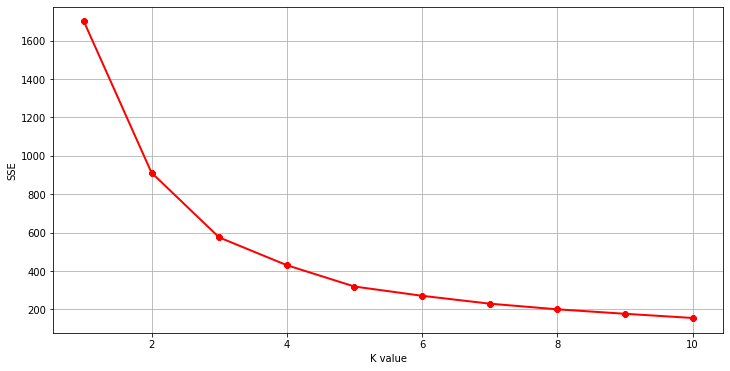

In [19]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), sse, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show

In [25]:
# u can change the cluster size here, and manipulate the algorithm
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(X) 
# above u can use prdict(df[['coulmn1', 'coulmn2']]) if u have preprocessed individual columns 
print(label)

[0 0 1 1 2 0 0 0 1 2 0 1 1 0 1 1 1 0 0 1 1 0 1 0 2 0 1 0 0 1 0 0 1 0 1 1 1
 1 1 2 1 2 1 2 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 2 0 1 1 2 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 2 0 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 2 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 2 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 2 0 2 0 1 0 0 0 1 2 0 1 1 1 0 0 0 1 0 1 0 0 1 2
 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 2 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 2 2 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 2 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 2 1 1 1 1 0 0 1 1 1 2 1 1 1 0 1 0 2 2 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 0 2 1 0 1 1 0 0 1 0 1 1 1 1 2 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 2
 0 1 0 0 0 1 0 1 1 1 2 1 1 1 1 0 0 2 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 

In [26]:
# way of appending the dataframe where we add a new column to clusters
df['Cluster'] = label
df.head(5)

,Age,Income,Card Debt,Other Debt,Cluster
0,41,19,0.124,1.073,0
1,47,100,4.582,8.218,0
2,33,57,6.111,5.802,1
3,29,19,0.681,0.516,1
4,47,253,9.308,8.908,2


In [27]:
df.groupby('Cluster').mean()

,Age,Income,Card Debt,Other Debt
Cluster,,,,
0,42.027273,51.796970,1.776230,3.434306
1,29.034115,30.628998,1.075277,2.146614
2,44.882353,161.098039,4.898745,9.350471


In [28]:
# printing the centroids of the cluster
print(kmeans.cluster_centers_)

[[ 0.87073811  0.13296017]
 [-0.74598985 -0.41656646]
 [ 1.2259934   2.97044735]]


# Look at the clusters

Now, lets look at the distribution of customers based on their age and income:


<function matplotlib.pyplot.show(close=None, block=None)>

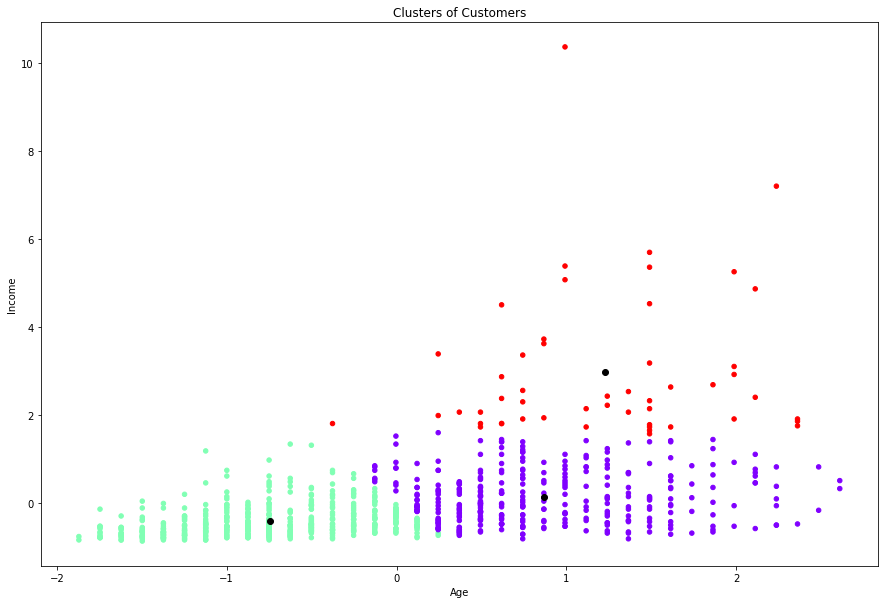

In [29]:
plt.figure(figsize = (15,10))

plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = 'rainbow', s = 20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show